# Wstęp do Sztucznej Inteligencji - rok akademicki 2018/2019

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Zadanie 1 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Mamdani, który będzie oceniał stopień przekonania o możliwości spowodowania wypadku podczas jazdy samochodem.

Zmienne wejściowe: 

- prędkość jazdy (10 − 200km/h ): `mała`, `średnia`, `szybka`, `bardzo szybka` 
- widoczność (0.05 − 4km): `bardzo słaba`, `średnia`, `dobra`. 

Wyjście systemu: 

- stopień przekonania o możliwości spowodowania wypadku (0 − 1): `bardzo małe`, `małe`, `średnie`, `duże`.

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

#### TWÓJ PROGRAM:

<IPython.core.display.Javascript object>


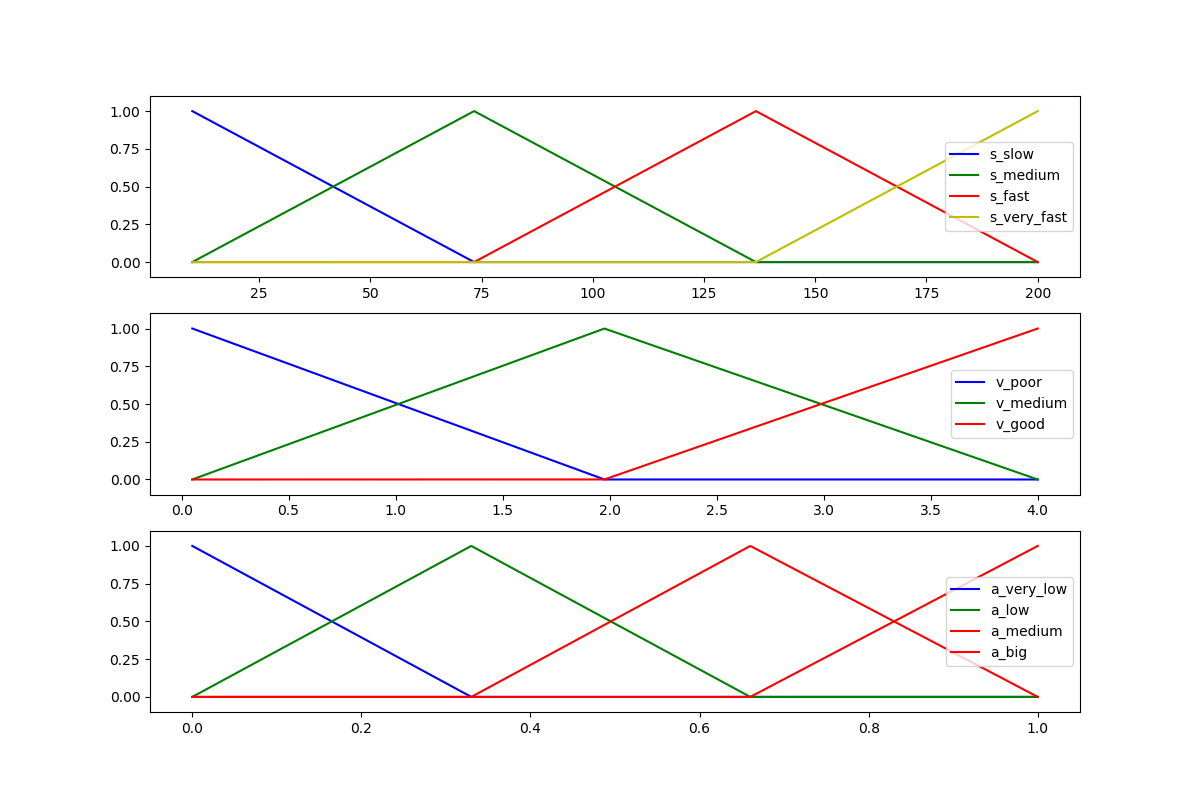

Speed: 199 Visibility: 0.1
{'rb_mamdani': {'accident': 0.8821219211186073}}
reduce() of empty sequence with no initial value


<IPython.core.display.Javascript object>


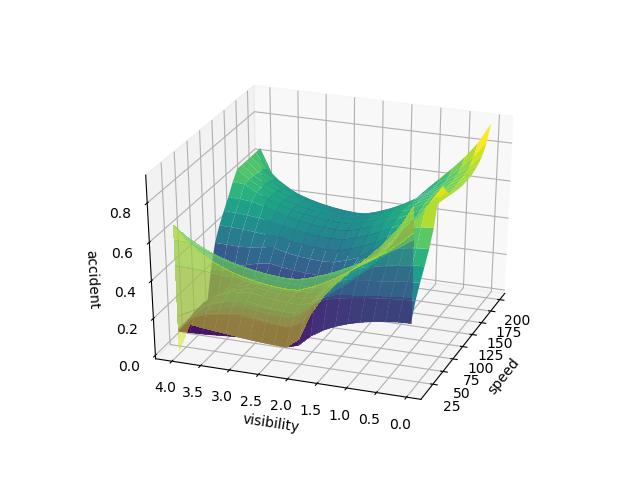

In [9]:
from fuzzython.fsets.triangular import Triangular
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
from fuzzython.ruleblock import RuleBlock
import numpy as np
import matplotlib.pyplot as plt
from fuzzython.systems.mamdani import MamdaniSystem

from fuzzython.norms import norms


# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()


s_slow = Triangular((9.99, 0), (10, 1), (73.33, 0))
s_medium = Triangular((10, 0), (73.33, 1), (136.66, 0))
s_fast = Triangular((73.34, 0), (136.66, 1), (200, 0))
s_very_fast = Triangular((136.66, 0), (200, 1), (200.1, 0))

a_s_slow = Adjective("s_slow", s_slow)
a_s_medium = Adjective("s_medium", s_medium)
a_s_fast = Adjective("s_fast", s_fast)
a_s_very_fast = Adjective("s_very_fast", s_very_fast)

speed = Variable("speed", "km/h", a_s_slow, a_s_medium, a_s_fast, a_s_very_fast)

v_poor = Triangular((0.04, 0), (0.05, 1), (1.975, 0))
v_medium = Triangular((0.05, 0), (1.975, 1), (4, 0))
v_good = Triangular((1.975, 0), (4, 1), (4.1, 0))

a_v_poor = Adjective("v_poor", v_poor)
a_v_medium = Adjective("v_medium", v_medium)
a_v_good = Adjective("v_good", v_good)

visibility = Variable("visibility", "km", a_v_poor, a_v_medium, a_v_good)

a_very_low = Triangular((-0.01, 0), (0, 1), (0.33, 0))
a_low = Triangular((0,0), (0.33, 1), (0.66, 0))
a_medium = Triangular((0.33, 0), (0.66, 1), (1, 0))
a_big = Triangular((0.66, 0), (1, 1), (1.1, 0))

a_a_very_low = Adjective("a_very_low", a_very_low)
a_a_low = Adjective("a_low", a_low)
a_a_medium = Adjective("a_medium", a_medium)
a_a_big = Adjective("a_big", a_big)

accident = Variable("accident", "%", a_a_very_low, a_a_low, a_a_medium, a_a_big, defuzzification='COG', default=0)

# wykresy poglądowe
x = np.linspace(10,200,1000)
x2 = np.linspace(0.05, 4, 1000)
x3 = np.linspace(0, 1, 1000)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
plot_fuzzyset(ax1, s_slow, x, 'b', label='s_slow')
plot_fuzzyset(ax1, s_medium, x, 'g', label='s_medium')
plot_fuzzyset(ax1, s_fast, x, 'r', label='s_fast')
plot_fuzzyset(ax1, s_very_fast, x, 'y', label='s_very_fast')
plot_fuzzyset(ax2, v_poor , x2, 'b', label='v_poor')
plot_fuzzyset(ax2, v_medium, x2, 'g', label='v_medium')
plot_fuzzyset(ax2, v_good , x2, 'r', label='v_good')
plot_fuzzyset(ax3, a_very_low, x3, 'b', label='a_very_low')
plot_fuzzyset(ax3, a_low, x3, 'g', label='a_low')
plot_fuzzyset(ax3, a_medium, x3, 'r', label='a_medium')
plot_fuzzyset(ax3, a_big, x3, 'r', label='a_big')
plt.show()

scope = locals()

rule1 = 'if speed is a_s_slow and visibility is a_v_good or visibility is a_v_medium then accident is a_a_very_low'
rule2 = 'if speed is a_s_slow and visibility is a_v_poor then accident is a_a_low'
rule3 = 'if visibility is a_v_poor and speed is not a_s_slow then accident is a_a_big'
rule4 = 'if speed is a_s_medium and visibility is a_v_good then accident is a_a_very_low'
rule5 = 'if speed is a_s_medium and visibility is a_v_medium then accident is a_a_low'
rule6 = 'if speed is a_s_fast visibility is a_v_good then accident is a_a_medium'
rule7 = 'if speed is a_s_very_fast and visibility is a_v_poor then accident is a_a_big'


block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, rule4, rule5, rule6, scope=scope)

mamdani = MamdaniSystem('mamdani_model', block)
# dane wejściowe
input = {'speed': 199, 'visibility': 0.1}
# obliczenie odpowiedzi
result = mamdani.compute(input)
#zwraca słownik
print("Speed:", input['speed'], "Visibility:", input['visibility'])
print(result)

from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting


# przygotowanie siatki
sampled1 = np.linspace(10, 200, 20)
sampled2 = np.linspace(0.05, 4, 20)
sampled3 = np.linspace(0, 1, 20)
x, y = np.meshgrid(sampled1, sampled2)
z = np.zeros((len(sampled3),len(sampled3)))

for i in range(len(sampled1)):
    for j in range(len(sampled2)):
        inputs = {'speed': x[i, j], 'visibility': y[i, j]}
        res = mamdani.compute(inputs)
        z[i, j] = res['rb_mamdani']['accident']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset=-1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)
ax.set_xlabel('speed')
ax.set_ylabel('visibility')
ax.set_zlabel('accident')
ax.view_init(30, 200)




## Zadanie 2 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Takagi-Sugeno, który będzie prognozował cenę akcji na jeden dzień do przodu.

Zmienne wejściowe: 

- cena akcji wczoraj (1 − 20zł): `niska`, `średnia`, `wysoka`, 

- cena akcji dziś (1 − 20zł): `niska`, `średnia`, `wysoka`. 

Wyjście systemu: 

- cena akcji jutro dana równaniem regresji: $\alpha\cdot x + \beta\cdot y + \gamma$

Reguły postaci:

- Jeśli cena akcji wczoraj była $A_i$ i cena akcji dziś jest $B_i$ to cena akcji jutro będzie $\alpha_k\cdot x + \beta_k\cdot y + \gamma_k$,

gdzie:

- $x$ to cena akcji wczoraj (ostra wartość)

- $y$ to cena akcji dziś (ostra wartość)

- $A_i, B_i$ to zbiory rozmyte odpowiednio dla ceny akcji wczoraj i dziś

- $\alpha_k, \beta_k, \gamma_k$ - współczynniki w równaniu regresji (liczby rzeczywiste)

- $k$ - numer reguły

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły (dobór współczynników regresji) oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

#### TWÓJ PROGRAM:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>